from tensorflow.compat.v1 import InteractiveSession
from tensorflow.compat.v1 import ConfigProto

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [1]:
#Library required
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten  #
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.applications import inception_v3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
import matplotlib as plt

import numpy as np
from glob import glob

many models are available in the keras library,i already tried with mobilenet and Resnet50 and inception_v3 and ResNet152V2.ResNet152V2 model give better accuracy compared with others.

- Mobilenet is the small Model created by Goolgle,its have less number of parameter.
- Resnet50 & inception_v3 Contain less number of parameter compared to ResNet152V2.


In [2]:
image_size = [224,224]

In [3]:
resnet_m = ResNet152V2(input_shape=image_size + [3], weights='imagenet', include_top=False)

ResNet152V2 model is used in image net competition,so those weights are already trained we need to re-train all weights.

In [4]:
for i in resnet_m.layers:
    i.trainable = False
    
X = Flatten()(resnet_m.output)

In [5]:
#No.of output class
y = len(glob(r"E:\Deep_learning\My DL projects\Cotton\Data\train\*"))

#output layer
prediction = Dense(y,activation="softmax")(X)

In [6]:
#Model Creation
model = Model(inputs=resnet_m.input,outputs=prediction)

In [7]:
#Structure of the Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

conv4_block33_1_relu (Activatio (None, 14, 14, 256)  0           conv4_block33_1_bn[0][0]         
__________________________________________________________________________________________________
conv4_block33_2_pad (ZeroPaddin (None, 16, 16, 256)  0           conv4_block33_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block33_2_conv (Conv2D)   (None, 14, 14, 256)  589824      conv4_block33_2_pad[0][0]        
__________________________________________________________________________________________________
conv4_block33_2_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block33_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block33_2_relu (Activatio (None, 14, 14, 256)  0           conv4_block33_2_bn[0][0]         
__________________________________________________________________________________________________
conv4_bloc

In [8]:
#in my opinion Adam is best optimizer for CNN
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model is created now we need to Process the input images

In [9]:
#Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
train_path = r"E:\Deep_learning\My DL projects\Cotton\Data\train"
test_path = r"E:\Deep_learning\My DL projects\Cotton\Data\test"
val_path = r"E:\Deep_learning\My DL projects\Cotton\Data\val"

In [11]:
train = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 32,
                                        class_mode = 'categorical')

val = val_datagen.flow_from_directory(val_path,target_size = (224,224),batch_size = 32,
                                        class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_path,target_size = (224,224),batch_size = 32,
                                        class_mode = 'categorical')


Found 794 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [12]:
#Running the model
cotton = model.fit_generator(
  train,
  validation_data=test,
  epochs=15,
  steps_per_epoch=25,
  validation_steps=5
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
25/25 [==============================] - 37s 1s/step - loss: 0.9825 - accuracy: 0.8249 - val_loss: 0.5649 - val_accuracy: 0.8750
Epoch 2/15
25/25 [==============================] - 27s 1s/step - loss: 0.4499 - accuracy: 0.9395 - val_loss: 7.4506e-07 - val_accuracy: 1.0000
Epoch 3/15
25/25 [==============================] - 27s 1s/step - loss: 0.2316 - accuracy: 0.9584 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/15
25/25 [==============================] - 27s 1s/step - loss: 0.1858 - accuracy: 0.9710 - val_loss: 5.1110e-06 - val_accuracy: 1.0000
Epoch 5/15
25/25 [==============================] - 30s 1s/step - loss: 0.0942 - accuracy: 0.9723 - val_loss: 2.4713e-04 - val_accuracy: 1.0000
Epoch 6/15
25/25 [==============================] - 28s 1s/step - loss: 0.1145 - accuracy: 0.9773 - val_loss: 4.6194e-07 - val_accuracy: 1.0000
Epoch 7/15
25/25 [==============================] - 28s 1s/step - lo

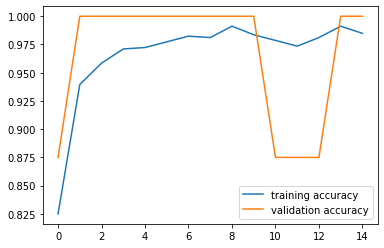

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the accuracy
import matplotlib.pyplot as plt 
plt.plot(cotton.history['accuracy'], label='training accuracy')
plt.plot(cotton.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_for_Cotton.jpg')

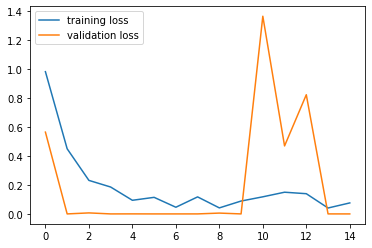

<Figure size 432x288 with 0 Axes>

In [14]:
#plot the loss
plt.plot(cotton.history['loss'], label='training loss')
plt.plot(cotton.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('loss_for_cotton.pdf')

In [15]:
#Save the model
model.save('model_cotton_pre2.h5')

In [16]:
#prediction
y_pre = model.predict(test)
y_pre

array([[2.5215445e-06, 9.9999750e-01],
       [1.0000000e+00, 9.5556780e-26],
       [8.8372673e-23, 1.0000000e+00],
       [4.3643000e-14, 1.0000000e+00],
       [9.6896206e-11, 1.0000000e+00],
       [4.4725474e-17, 1.0000000e+00],
       [1.0000000e+00, 2.7670875e-38],
       [1.0000000e+00, 2.9792874e-19]], dtype=float32)

In [17]:
import numpy as np
y_pre = np.argmax(y_pre,axis=1)

In [18]:
y_pre

array([1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [19]:
#Prediction for single input
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image

In [35]:
img=image.load_img(r'E:\Deep_learning\My DL projects\Cotton\Data\train\fresh cotton leaf\d (55)_iaip.jpg',target_size=(224,224))

## Diseased leaf

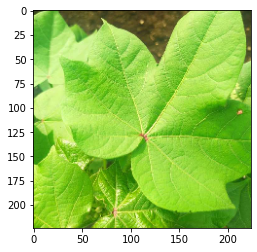

In [36]:
plt.imshow(img)

In [37]:
x=image.img_to_array(img)

In [38]:
#Scale down the input value
x = x/255

In [39]:
#resize the input to Model requirement
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [40]:
pre = model.predict(img_data)
ans = np.argmax(model.predict(img_data),axis=1)

In [42]:
if ans==0:
    print("Diseased leaf ")
else:
    print("Fresh leaf")

Fresh leaf 


Check out this page for other models

   url : https://keras.io/api/applications/